<div style="text-align:center"><img src="assets/intro.jpg"/></div>

# <span style="color:#264896">Analyse et description du fichier source</span>

### <span style="color:#17aafa">Sommaire</span>

1. [Lexique](#lexique)    
2. [Description et informations sur le fichier](#describe)     
3. [Test d'adéquation - loi normale](#normale)    
4. [Analyse bivariée](#pairplots)

In [1]:
# Importation des librairies Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
plt.style.use('seaborn-whitegrid')
import seaborn as sns

import statsmodels.api as sm
import scipy.stats as scs

In [2]:
# importation du fichier source
dataset = pd.read_csv("datas/notes.csv", sep=",", decimal=".", header=0)
dataset.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


### <span style="color:#17aafa" id="lexique">Lexique</span>

Ce dataframe va contenir les caractéristiques géométriques de billets de banque. Pour chacun d'eux, nous connaissons :

- **length** : la longueur du billet *(en mm)* ;
- **height_left** : la hauteur du billet *(mesurée sur le côté gauche, en mm)** ;
- **height_right** : La hauteur du billet *(mesurée sur le côté droit, en mm)* ;
- **margin_up** : la marge entre le bord supérieur du billet et l'image de celui-ci *(en mm)* ;
- **margin_low** : la marge entre le bord inférieur du billet et l'image de celui-ci *(en mm)* ;
- **diagonal** : la diagonale du billet *(en mm)* ;
- **is_genuine** : Indication si le billet est vrai *(True)* ou faux *(False)*.

### <span style="color:#17aafa" id="describe">Description et informations sur le fichier</span>

In [3]:
# Informations
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    bool   
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB


Nous constatons qu'il n'y a à ce stade aucune donnée manquante. Les 170 individus ont l'ensemble de leurs variables complétées.

In [4]:
# Description
dataset.describe(include="all")

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,170,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN
top,True,NaN,NaN,NaN,NaN,NaN,NaN
freq,100,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,NaN,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,NaN,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,NaN,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,NaN,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,NaN,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500


On remarque ici qu'il ne semble pas y avoir de valeurs aberrantes, is_genuine ne compte bien que 2 valeurs par exemple. Les moyennes, minimum et maximum semblent cohérent ainsi que les écart-types. 

**Affichons la répartition des vrais/faux billets** :

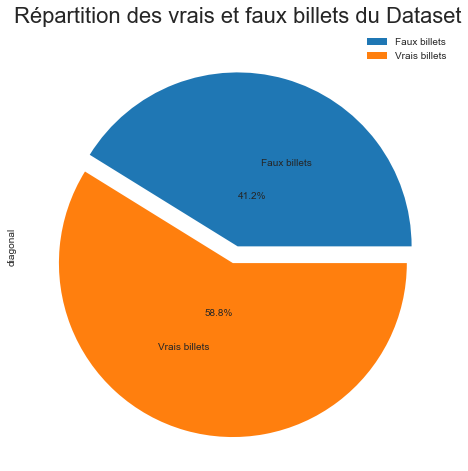

In [5]:
data_genuine = dataset.groupby("is_genuine").count()
data_genuine.plot.pie(y="diagonal",figsize=(8, 8),
                                explode = [0, 0.1],
                                labels = ["Faux billets", "Vrais billets"],
                                autopct = '%1.1f%%',
                                pctdistance = 0.3, labeldistance = 0.5)

plt.title('Répartition des vrais et faux billets du Dataset', 
  loc='center', 
  fontsize=22)
plt.savefig('graph/DESCRIBE_repartition_vrai_faux.png')
plt.show()

41,2 % des billets présents dans le jeu de données sont des faux.
Analysons les variables indépendamment pour vérifier leur distribution globale. 

**Nous allons afficher la distribution de chaque variable pour vérifier graphiquement** :

In [6]:
def var_hist(var, i):
    subset = dataset[var]
    n_dataset = len(dataset)
    xbar = np.mean(dataset[var]) # Moyenne
    sprime = np.std(dataset[var], ddof=1) # Ecart-type
    sprime2 = np.var(dataset[var], ddof=1) #Variance non biaisée
    ax = fig.add_subplot(i)
    ax.hist(subset, density=True)
    ax.axvline(xbar, color='r', linewidth=2, label="Moyenne empirique")
    bins = np.arange(dataset[var].min(),dataset[var].max(),0.05)
    y = scs.norm.pdf(bins, xbar, sprime)
    ax.plot(bins, y, '--', label="Densité normale")
    ax.legend()
    ax.set_xlabel(var, fontsize=12)
    ax.set_ylabel('Densité', fontsize=12)
    ax.set_title('Distribution de '+str(var), fontsize=18)

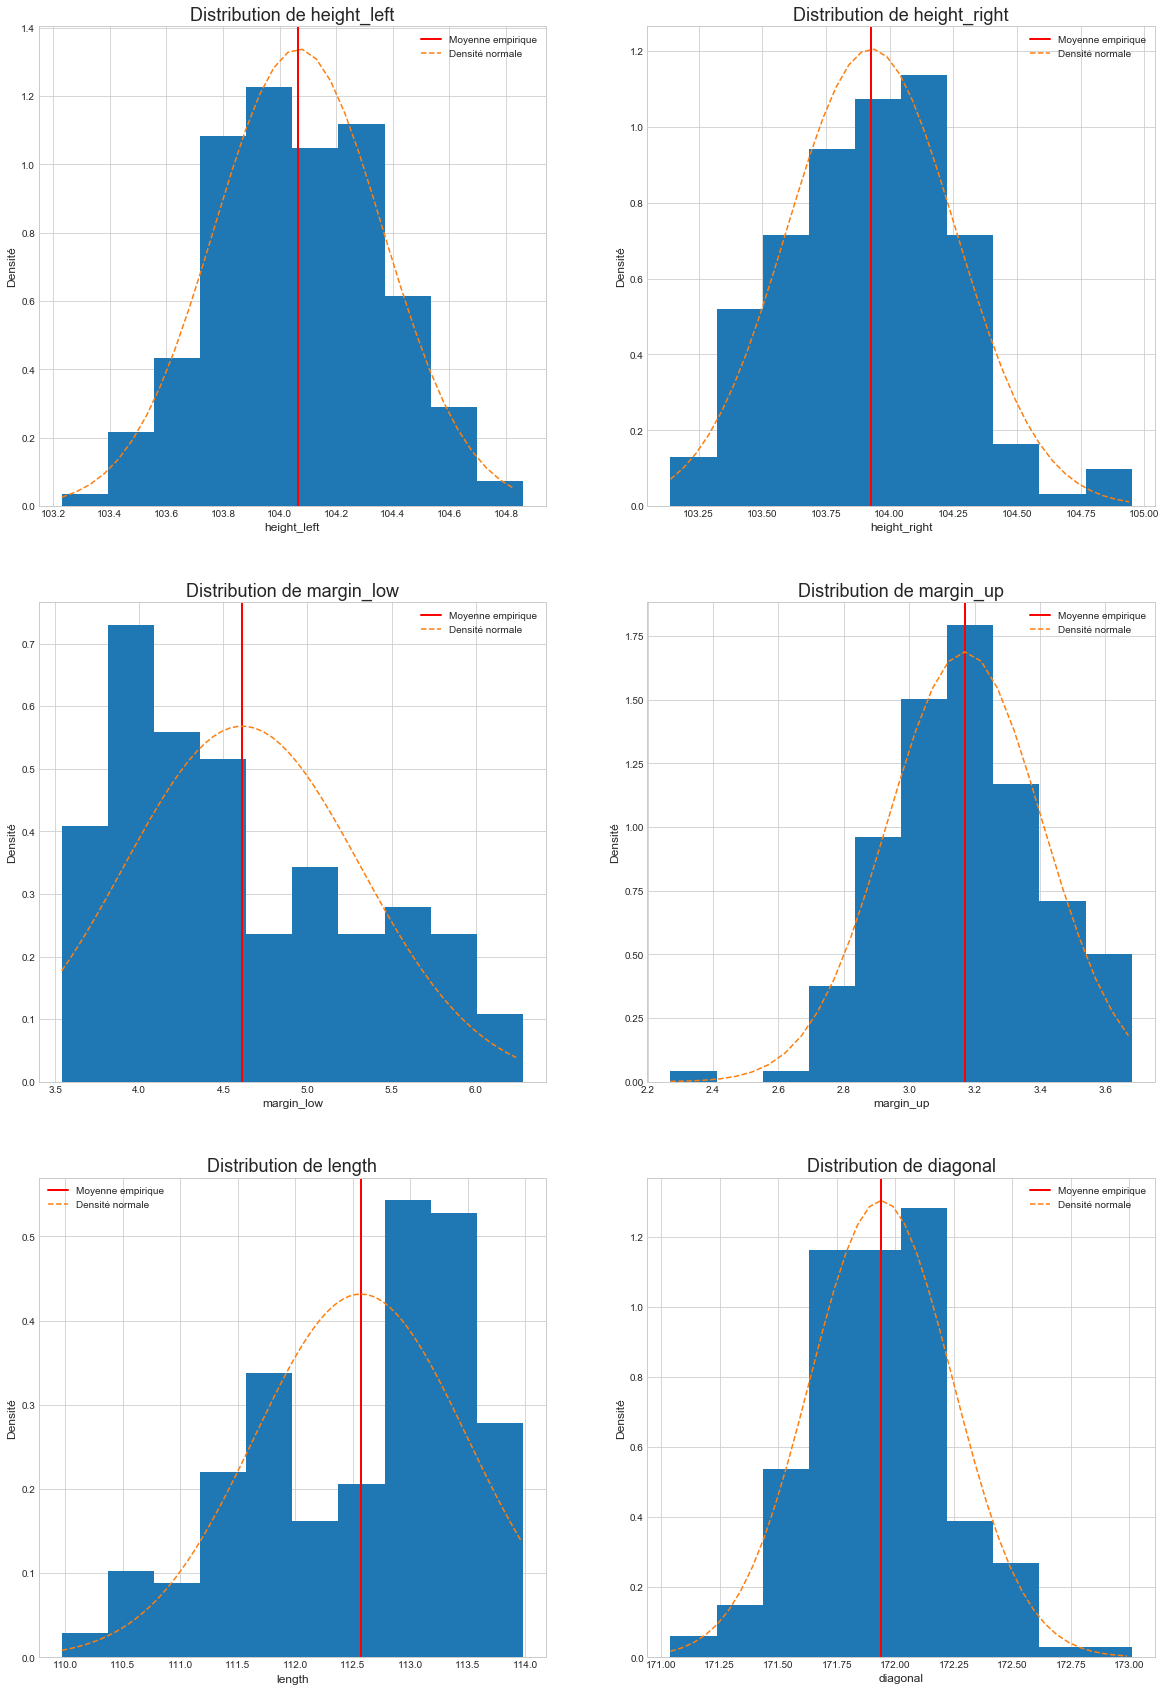

In [8]:
liste_var = ["height_left","height_right","margin_low","margin_up","length","diagonal"]

fig = plt.figure(figsize=(20,30),constrained_layout=False)
i = 321
for var in liste_var :
    var_hist(var, i)
    i+=1
fig.savefig('graph/DESCRIBE_distributions_variables_1.png')

### <span style="color:#17aafa" id="normale">Test d'adéquation - loi normale</span>

In [9]:
liste_var = liste_var
for var in liste_var :
    print(var,":",scs.ks_2samp(dataset[var],list(np.random.normal(np.mean(dataset[var]), np.std(dataset[var]), 1000))))

height_left : Ks_2sampResult(statistic=0.05764705882352941, pvalue=0.6951015140067219)
height_right : Ks_2sampResult(statistic=0.05905882352941177, pvalue=0.6664568292628656)
margin_low : Ks_2sampResult(statistic=0.11082352941176471, pvalue=0.051760980240372345)
margin_up : Ks_2sampResult(statistic=0.04370588235294118, pvalue=0.9311750634881267)
length : Ks_2sampResult(statistic=0.15094117647058825, pvalue=0.002336937581250753)
diagonal : Ks_2sampResult(statistic=0.07076470588235294, pvalue=0.43845852587624423)


Grâce au test de Kolmogorov-Smirnov réalisé ci-dessus, **les Pvalues ne permettent pas de rejetter l'hypothèse gaussienne** sur les variables suivantes *(au niveau de test 5%)* :
- height_left
- height_right
- margin_up
- diagonal

En revanche, pour les variables margin_low et length, le niveau de test 5% ne permet pas de conclure à l'adéquation à la loi normale, ce que semblent aussi montrer les histogrammes.

### <span style="color:#17aafa" id="pairplots">Analyse bivariée</span>

Dans un premier temps, nous allons visualiser la **matrice des corrélations** *(linéaires / Pearson)*, puis afficher un **pairplot** des variables 2 à 2 du dataset :

In [10]:
dataset.corr(method='pearson')

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.139223,-0.461730,-0.551309,-0.800111,-0.582801,0.825743
diagonal,0.139223,1.000000,0.319584,0.220418,-0.181020,-0.027366,0.080295
height_left,-0.461730,0.319584,1.000000,0.734390,0.424530,0.324788,-0.421387
height_right,-0.551309,0.220418,0.734390,1.000000,0.509375,0.366918,-0.417021
margin_low,-0.800111,-0.181020,0.424530,0.509375,1.000000,0.171113,-0.637352
margin_up,-0.582801,-0.027366,0.324788,0.366918,0.171113,1.000000,-0.525284
length,0.825743,0.080295,-0.421387,-0.417021,-0.637352,-0.525284,1.000000


Les coefficients de Pearson *(r)* ci-dessus nous montrent plusieures corrélations linéaires assez fortes :
- height_right / height_left avec $r = 0.73$ 
- height_right / margin_low avec $r = 0.51$ 
- margin_low / length avec $r = -0.64$
- margin_up / length avec $r = -0.52$

Très intéressant également, la variable "vrai/faux billet" *(is_genuine)* semble être très corrélé avec :
- margin_low avec $r = -0.80$
- length avec $r = 0.82$

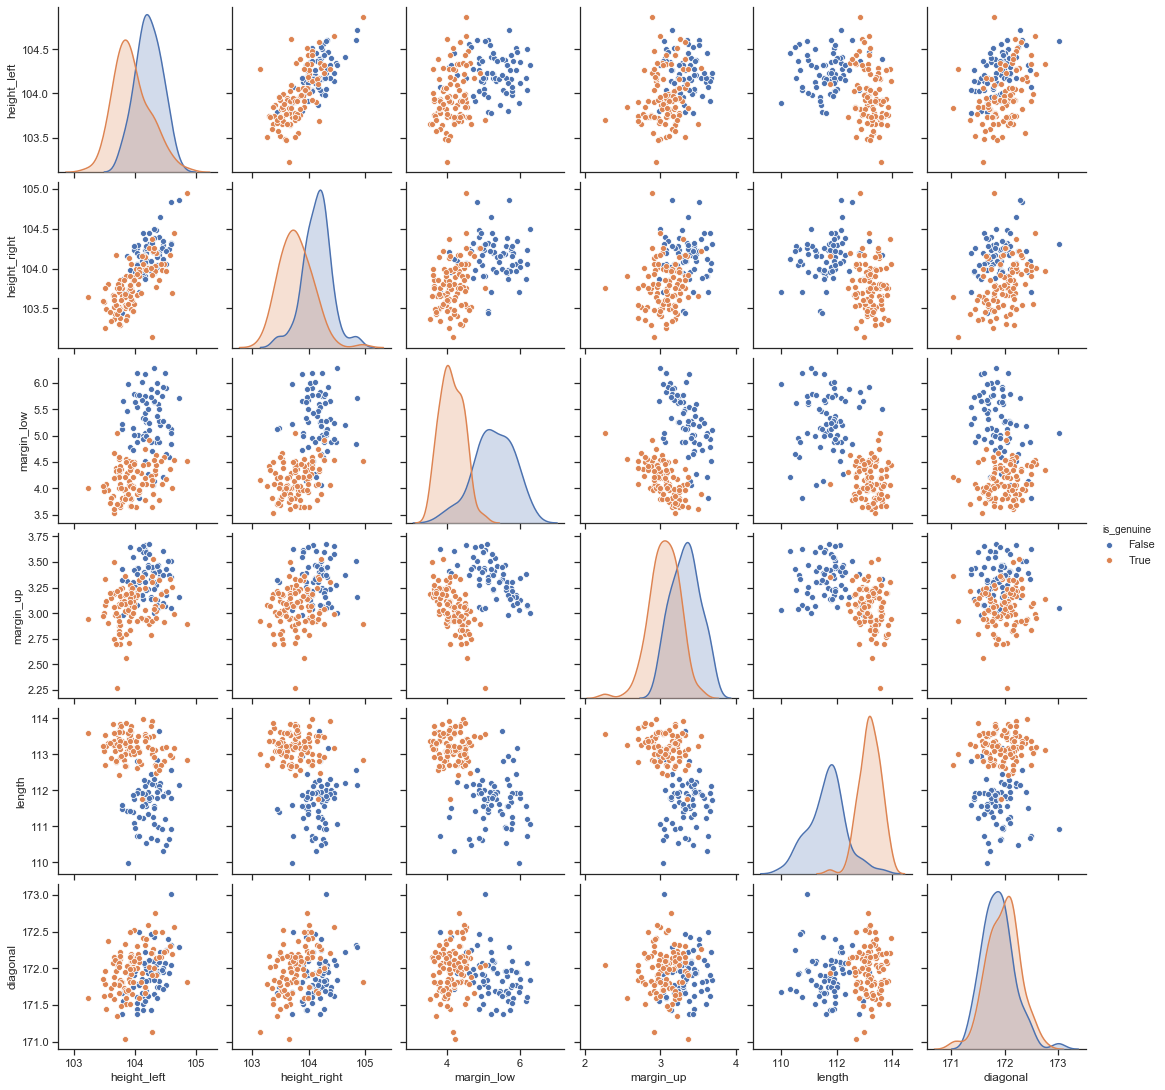

In [11]:
# Pairplot sur les variables 2 à 2 du dataset
sns.set(style="ticks")
sns.pairplot(dataset[["height_left","height_right","margin_low","margin_up","length","diagonal","is_genuine"]], hue="is_genuine")
plt.savefig('graph/DESCRIBE_pairplots.png')

On retrouve ces corrélations sur les graphs ci-dessus. En réalisant ce pairplot avec la séparation de couleurs entre vrais et faux billets, **on remarque bien 2 groupes distincts pour chacune des variables**, qui permettent certainement de différencier les billets falcifiés.

**Nous allons à présent afficher les boxplots de répartition des variables en fonction de "is_genuine"** :

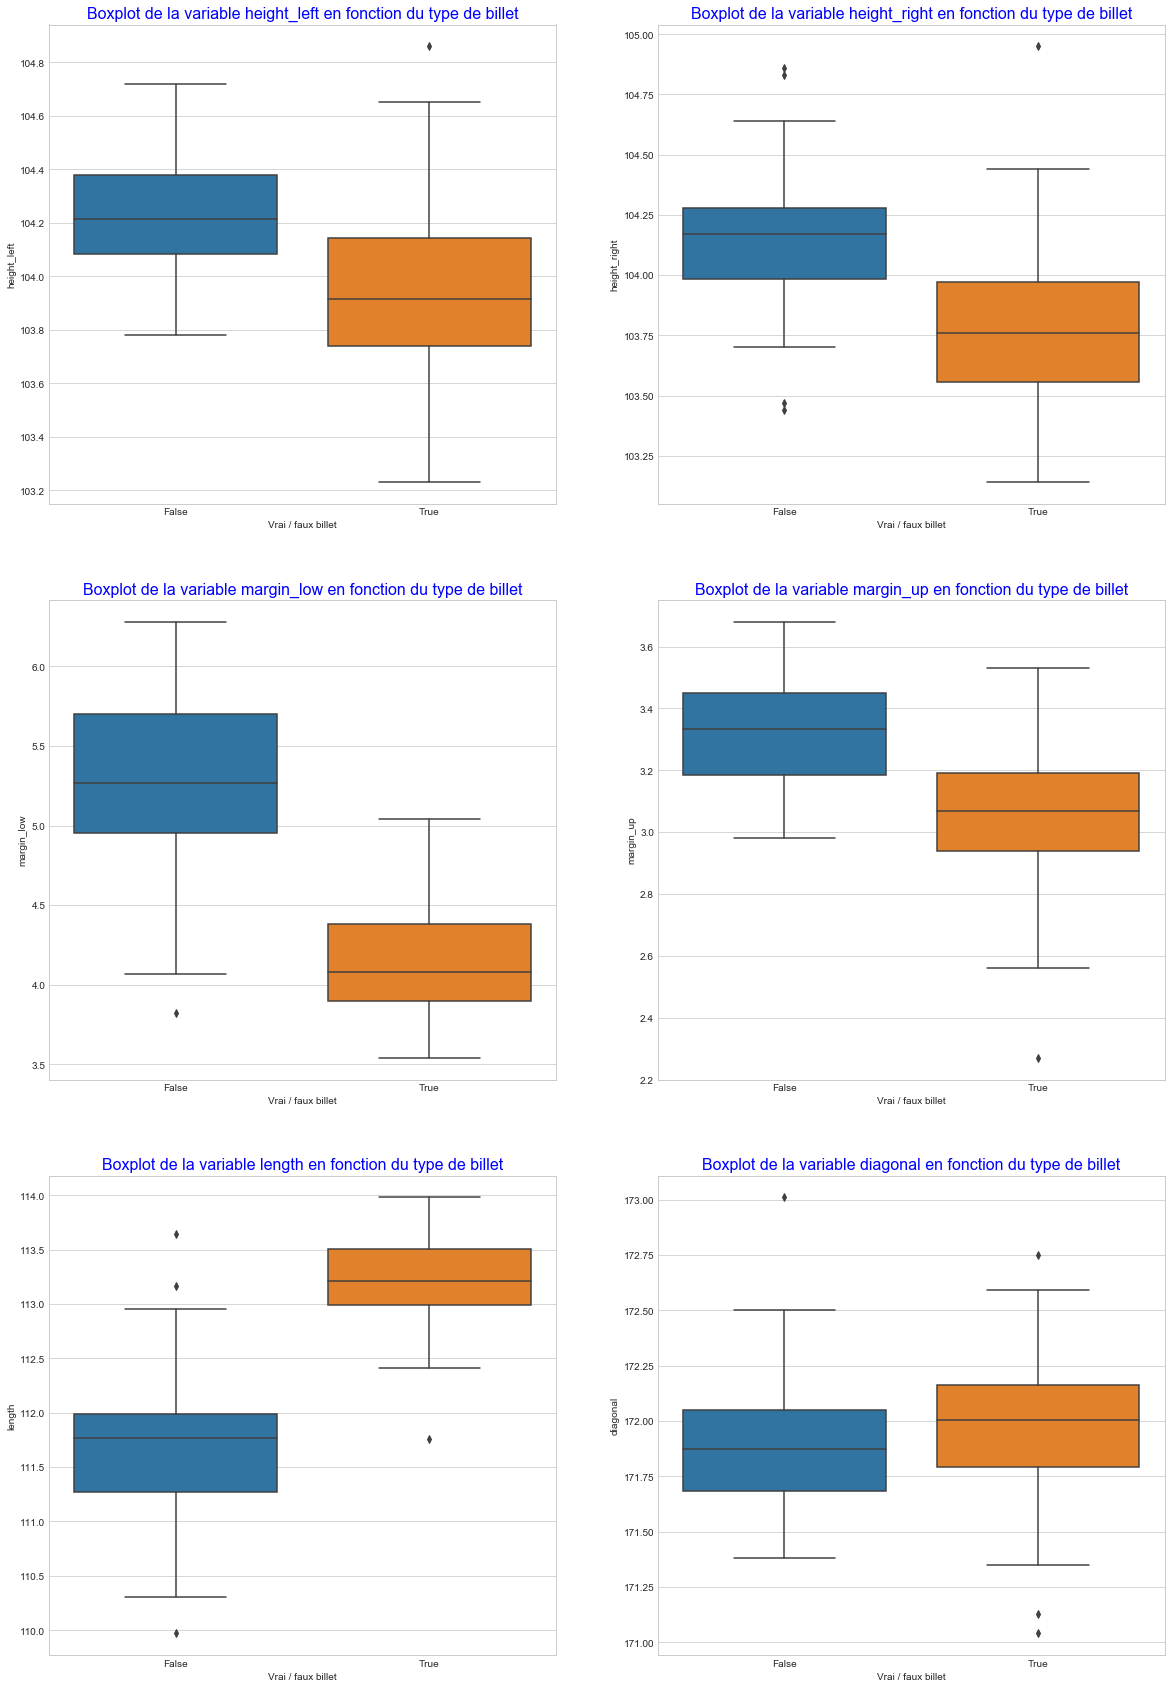

In [11]:
def var_boxplot(var, i):
    ax = fig.add_subplot(i)
    ax = sns.boxplot(x="is_genuine", y=var, data=dataset)
    plt.xlabel('Vrai / faux billet')
    plt.ylabel(var)
    plt.title('Boxplot de la variable '+str(var)+' en fonction du type de billet', color="blue", size=16)

liste_var = ["height_left","height_right","margin_low","margin_up","length","diagonal"]

fig = plt.figure(figsize=(20,30),constrained_layout=False)
i = 321
for var in liste_var :
    var_boxplot(var, i)
    i+=1
fig.savefig('graph/DESCRIBE_Boxplot_variables_1.png')

Si les variances sur ces variables restent relativement similaires entre les vrais et faux billets *(sauf pour margin_low)*, on constate là encore que les faux billets ont des valeurs médianes assez différentes des vrais billets.

On remarque également quelques outliers, surtout dans le cas des vrais billets, qu'il faudra sans doute prendre en considération.

Réalisons à présent une ACP dans la seconde partie :
[P6_02_ACP](P6_02_ACP.ipynb)